In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28
X = tf.placeholder(tf.float32, [None, n_input])

In [8]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [9]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [11]:
cost = tf.reduce_mean(tf.pow(X-decoder, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [12]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [14]:
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs})
        total_cost += cost_val
    print('Epoch:', '%04d' %(epoch+1), 'Avg.cost =', '{:.4f}'.format(total_cost/total_batch))

Epoch: 0001 Avg.cost = 0.0597
Epoch: 0002 Avg.cost = 0.0357
Epoch: 0003 Avg.cost = 0.0313
Epoch: 0004 Avg.cost = 0.0294
Epoch: 0005 Avg.cost = 0.0276
Epoch: 0006 Avg.cost = 0.0263
Epoch: 0007 Avg.cost = 0.0256
Epoch: 0008 Avg.cost = 0.0249
Epoch: 0009 Avg.cost = 0.0246
Epoch: 0010 Avg.cost = 0.0238
Epoch: 0011 Avg.cost = 0.0233
Epoch: 0012 Avg.cost = 0.0232
Epoch: 0013 Avg.cost = 0.0230
Epoch: 0014 Avg.cost = 0.0229
Epoch: 0015 Avg.cost = 0.0228
Epoch: 0016 Avg.cost = 0.0227
Epoch: 0017 Avg.cost = 0.0227
Epoch: 0018 Avg.cost = 0.0226
Epoch: 0019 Avg.cost = 0.0225
Epoch: 0020 Avg.cost = 0.0225


In [15]:
n = 4
canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(n)
    g = sess.run(decoder, feed_dict = {X:batch_x})
    
    for j in range(n):
        canvas_orig[i*28:(i+1)*28, j*28:(j+1)*28] = batch_x[j].reshape([28, 28])
    for j in range(n):
        canvas_recon[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])

Original Images


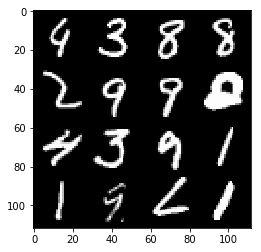

Reconstructed Images


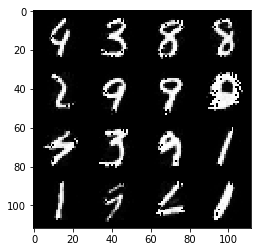

In [16]:
print("Original Images")
plt.figure(figsize =(n, n))
plt.imshow(canvas_orig, origin="upper", cmap = "gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [22]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

In [23]:
W1 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev = 0.01))
L1 = tf.nn.conv2d(X, W1, strides = [1, 2, 2, 1], padding = 'SAME')
L1 = tf.nn.relu(L1)
W_encode = tf.Variable(tf.random_normal([14*14*32, 256], stddev=0.01))
L2 = tf.reshape(L1, [-1, 14*14*32])
h = tf.matmul(L2, W_encode)

In [24]:
output_batch = tf.shape(X)[0]
deconv_shape = tf.stack([output_batch, 28, 28, 1])
W_decode = tf.Variable(tf.random_normal([256, 14*14*32]))
L3 = tf.matmul(h, W_decode)
W3 = tf.Variable(tf.random_normal([5, 5, 1, 32]))
L3 = tf.reshape(L3, [-1, 14, 14, 32])
decoder = tf.nn.conv2d_transpose(L3, W3, output_shape = deconv_shape, strides=[1, 2, 2, 1], padding='SAME')
decoder = tf.nn.sigmoid(decoder)

In [27]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
total_batch = int(mnist.train.num_examples/batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict = {X:batch_xs.reshape(-1, 28, 28, 1)})
        total_cost += cost_val
    print('Epoch:', '%04d' %(epoch+1), 'Avg.cost =', '{:.4f}'.format(total_cost/total_batch))


Epoch: 0001 Avg.cost = 0.0286
Epoch: 0002 Avg.cost = 0.0107
Epoch: 0003 Avg.cost = 0.0069
Epoch: 0004 Avg.cost = 0.0044
Epoch: 0005 Avg.cost = 0.0034
Epoch: 0006 Avg.cost = 0.0029
Epoch: 0007 Avg.cost = 0.0026
Epoch: 0008 Avg.cost = 0.0022
Epoch: 0009 Avg.cost = 0.0021
Epoch: 0010 Avg.cost = 0.0020
Epoch: 0011 Avg.cost = 0.0019
Epoch: 0012 Avg.cost = 0.0018
Epoch: 0013 Avg.cost = 0.0018
Epoch: 0014 Avg.cost = 0.0018
Epoch: 0015 Avg.cost = 0.0017
Epoch: 0016 Avg.cost = 0.0016
Epoch: 0017 Avg.cost = 0.0016
Epoch: 0018 Avg.cost = 0.0015
Epoch: 0019 Avg.cost = 0.0016
Epoch: 0020 Avg.cost = 0.0015


In [28]:
n = 4
canvas_orig = np.empty((28*n, 28*n))
canvas_recon = np.empty((28*n, 28*n))
for i in range(n):
    batch_x, _ = mnist.test.next_batch(100)
    g = sess.run(decoder, feed_dict = {X:batch_x.reshape(-1, 28, 28, 1)})
    for j in range(n):
        canvas_orig[i*28:(i+1)*28, j*28:(j+1)*28] = batch_x[j].reshape([28, 28])
    for j in range(n):
        canvas_recon[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28, 28])

Original Images


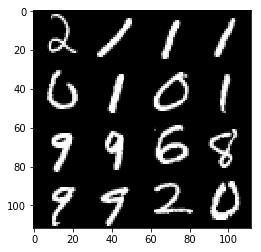

Reconstructed Images


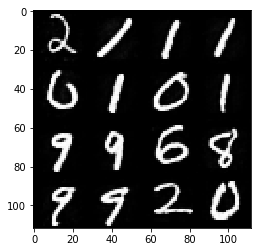

In [29]:
print("Original Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n,n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()